# Analysing the Tips Database using Seaborn #

## About Seaborn ##

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. [1]
Here is some of the functionality that seaborn offers:
A dataset-oriented API for examining relationships between multiple variables
Specialized support for using categorical variables to show observations or aggregate statistics
Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
Automatic estimation and plotting of linear regression models for different kinds dependent variables
Convenient views onto the overall structure of complex datasets
High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations
Concise control over matplotlib figure styling with several built-in themes
Tools for choosing color palettes that faithfully reveal patterns in your data [2]
In machine learning model while training any model you need to first find which features are important or on which features the result is dependent. This can be done using data analysis and data visualization.
We’ll learn how to visualize different types of data, and what we can infer from that plot, and when to use them.
Seaborn is a library built on matplotlib. It’s easy to use and can work easily with Numpy and pandas data structures.
We’ll be using inbuilt dataset provided by seaborn name tips. [3]

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics. It is used to understand data, get some context regarding it, understand the variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models. [4]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Database ##

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can see that sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data.
We will retrieve some common information such as min, max, unique and count for given numerical data.


## Univariate Plots ##

These plots are based on a single variable and show the frequency of uniques values of a given variable.

### Histogram ###


Larger the bins value more accurate the result
We can see that the count of different tip value present in the dataset and infer that most of the tips are between 2 and 4.


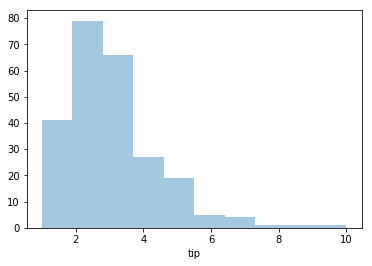

In [3]:
sns.distplot(tips['tip'], kde=False, bins=10);

## Distribution Plots ##

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. This article deals with the distribution plots in seaborn which is used for examining univariate and bivariate distributions. In this article we will be discussing 4 types of distribution plots namely:

joinplot
distplot
pairplot
rugplot



### Displot ###

It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset

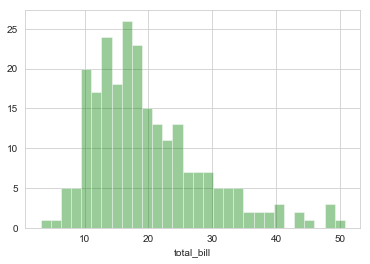

In [26]:
df = sns.load_dataset('tips')
sns.set_style('whitegrid') 
sns.distplot(df['total_bill'], kde = False, color ='green', bins = 30)

### Kerner Density Estimate (KDE)



C:\Users\Niamh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


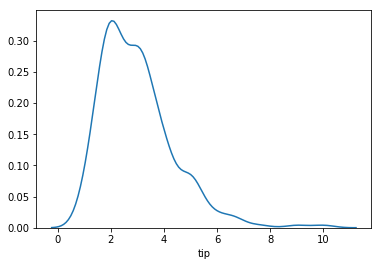

In [4]:
sns.distplot(tips['tip'],hist=False, bins=10);

### Joinplot ##

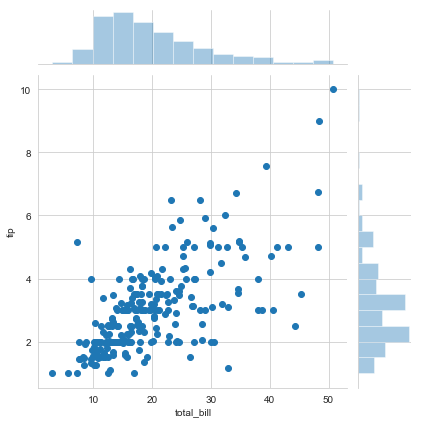

In [27]:
sns.jointplot(x ='total_bill', y ='tip', data = df) 

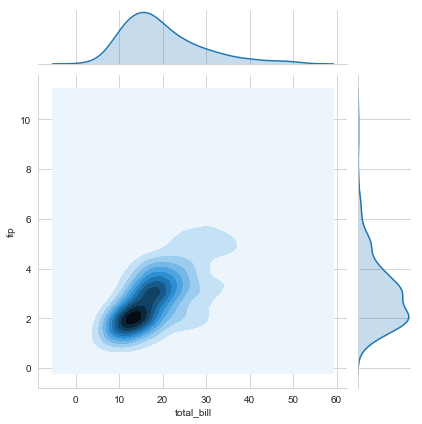

In [28]:

sns.jointplot(x ='total_bill', y ='tip', data = df, kind ='kde')

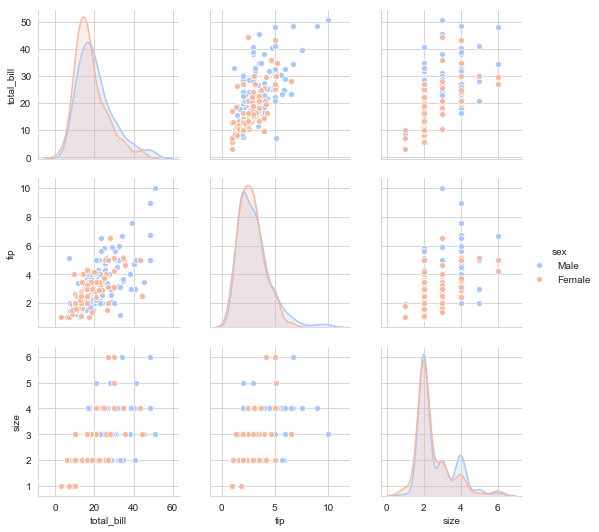

In [29]:
sns.pairplot(df, hue ="sex", palette ='coolwarm') 

## Bivariate Plots ##

This type of plots is used when you need to find a relation between two variables and to find how the value of one variable changes the value of another variable. Different types of plots are used based on the data type of the variable.

### Scatterplot ###

Default plot type of relplot is scatterplot. It shows the relationship between two variables. So, if you need to find the correlation between two variables scatterplot can be used.

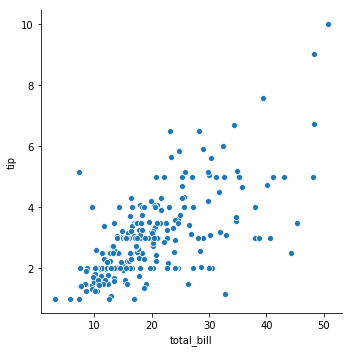

In [5]:
sns.relplot(x="total_bill", y="tip", data=tips);

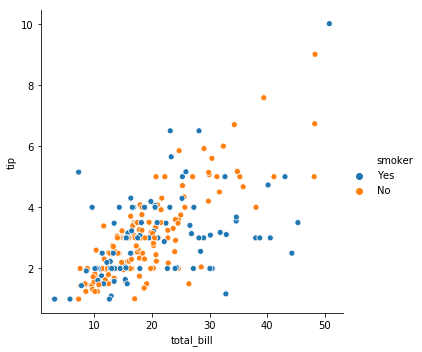

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

### Lineplot ###

This plot is similar to the scatterplot but instead of dots, it displays the line joining all the dots by arranging the variable value represented on the x-axis.
sns.relplot(x="total_bill", y="tip", kind="line", data=tips)

As we can see that distribution is too random of tips with respect to total_bills. We can infer that tip is not much dependent on the value of total_bill.
As line plot arranges the rows as per total_bill and then joins the points we can disable the sorting.


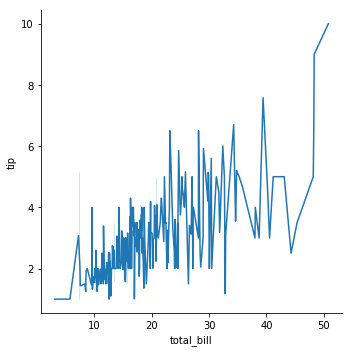

In [7]:
sns.relplot(x="total_bill", y="tip", kind="line", data=tips)

### Scatterplot ###

We can see that most of the tips are concentrated between 2 and 4 irrespective of the gender.
Different types of scatterplots can be made using attribute kind in seaborn.


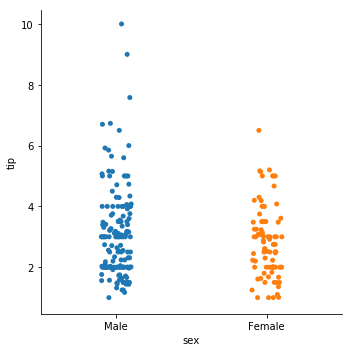

In [8]:
sns.catplot(x="sex", y="tip", data=tips);

The third variable can be used using attribute hue in seaborn.
The categories to be represented on the x-axis are sorted as per the pandas categories. If you want the order of your demand you can use order attribute in seaborn.

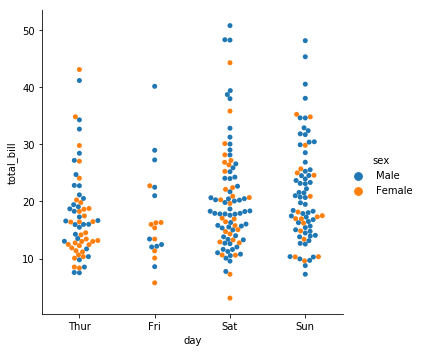

In [9]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

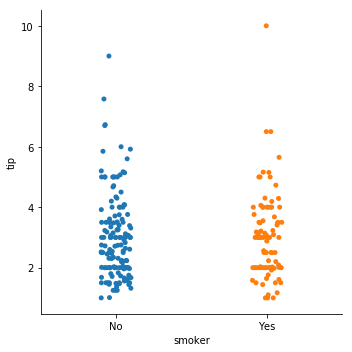

In [10]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

### Boxplot ###

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. It can give all the stats provided in dataset .describe in a single plot. If the dataset is too large and the range of value is too big then it shows some values as outliers based on an inter-quartile function.

The shaded box represents the values between 25-quartile and 75-quartile. The horizontal line in the shaded box shows the median. Two horizontal lines at the bottom and at the top represent the minimum, and the maximum value respectively. The dots represent the outliers calculated based on the inter-quartile function. Using these plots we can compare values for different categories in a single graph. We can infer from the given graph that the amount of total_bill is higher on weekends than weekdays.

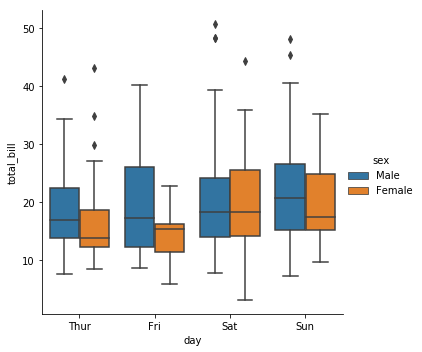

In [11]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips);

### Violin Plot ###

This plot is used to visualize the distribution of the data and its probability density. This chart is a combination of a Box Plot and a Density Plot. So if you need to find the frequency distribution along with box plot than us violin plot. On Friday we can see that female’s total_bill is much less than male’s total_bill.


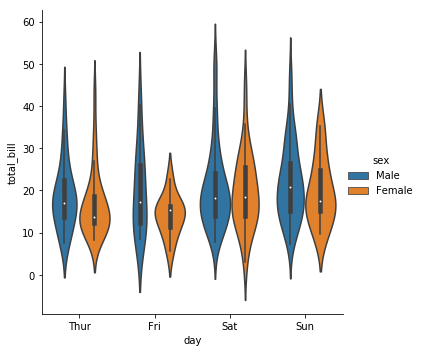

In [12]:
sns.catplot(x="day", y="total_bill", hue="sex",
kind="violin", data=tips);

### Point Plot ###

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. Point plot shows only mean values and error rate surrounding those mean values. They are not very much informative but are easy to find the change in a variable based on different categories.

Using this plot it’s so simple to find changes in total_bill according to days. The total_bill is rising for male’s as the weekend arises while it decreases on Friday for females and jumps on Saturday and remains mostly constant on Sunday.
These plots can be used for various data analysis and we can infer information regarding relations between different variables and can help to extract more significant features from the dataset.


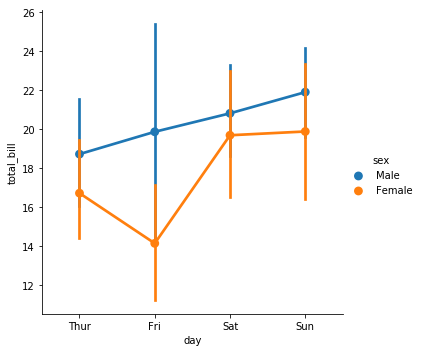

In [13]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="point", data=tips);

## Regression ##

### Simple linear plot ##

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. This article deals with those kinds of plots in seaborn and shows the ways that can be adapted to change the size, aspect, ratio etc. of such plots. [5]

Regression plots in seaborn can be easily implemented with the help of the lmplot() function. lmplot() can be understood as a function that basically creates a linear model plot. lmplot() makes a very simple linear regression plot.It creates a scatter plot with a linear fit on top of it


C:\Users\Niamh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


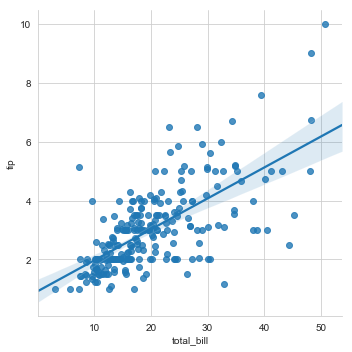

In [15]:
sns.set_style('whitegrid') 
sns.lmplot(x ='total_bill', y ='tip', data = tips)

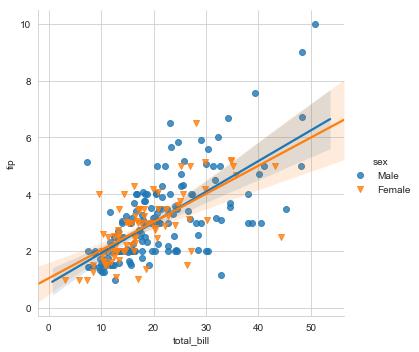

In [16]:
sns.set_style('whitegrid') 
sns.lmplot(x ='total_bill', y ='tip', data = tips,  
           hue ='sex', markers =['o', 'v']) 

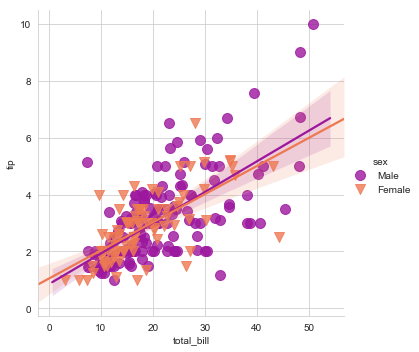

In [17]:
sns.set_style('whitegrid') 
sns.lmplot(x ='total_bill', y ='tip', data = tips, hue ='sex',  
           markers =['o', 'v'], scatter_kws ={'s':100},  
           palette ='plasma')

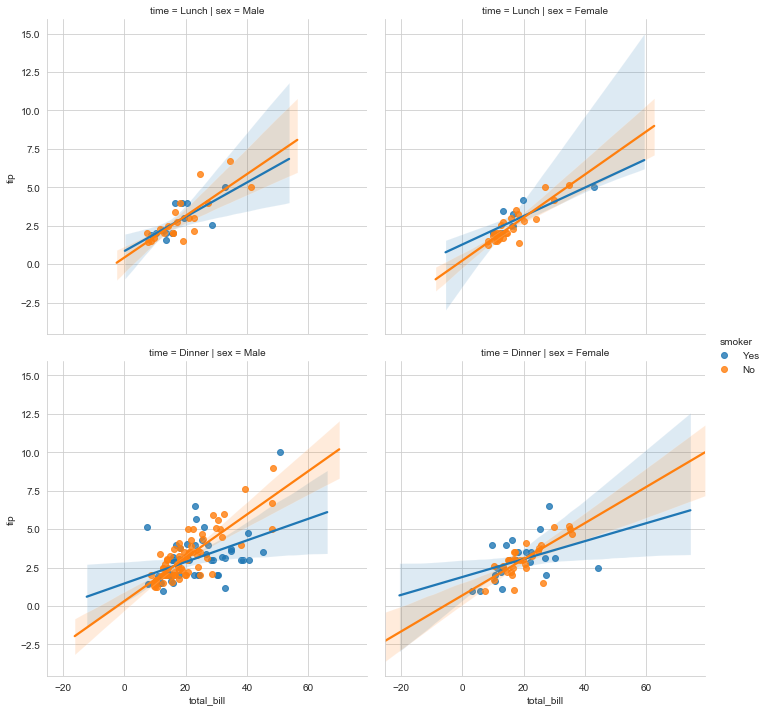

In [18]:
sns.lmplot(x ='total_bill', y ='tip', data = tips,  
           col ='sex', row ='time', hue ='smoker')

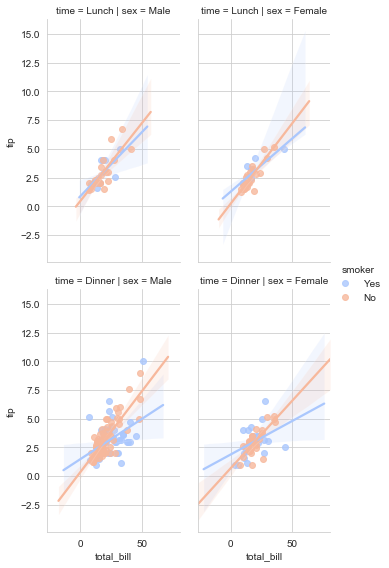

In [20]:
sns.lmplot(x ='total_bill', y ='tip', data = tips, col ='sex',  
           row ='time', hue ='smoker', aspect = 0.6,  
           height = 4, palette ='coolwarm')

In the above code, we draw multiple plots by specifying a separation with the help of the rows and columns. Each row contains the plots of tips vs the total bill for the different times specified in the dataset. Each column contains the plots of tips vs the total bill for the different genders. A further separation is done by specifying the hue parameter on the basis of whether the person smokes

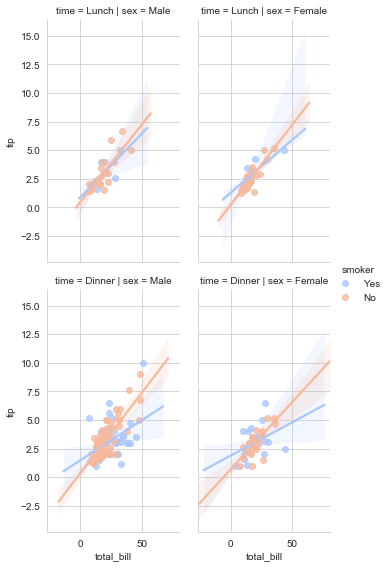

In [22]:
sns.lmplot(x ='total_bill', y ='tip', data = tips, col ='sex',  
           row ='time', hue ='smoker', aspect = 0.6,  
           height = 4, palette ='coolwarm')

Suppose we have a large number of plots in the output, we need to set the size and aspect for it in order to better visualize it.
aspect : scalar, optional specifies the aspect ratio of each facet, so that “aspect * height” gives the width of each facet in inches

[1] https://seaborn.pydata.org/introduction.html
[2] https://seaborn.pydata.org/introduction.html
3 https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
4 https://dev.to/nexttech/how-to-perform-exploratory-data-analysis-with-seaborn-29eo
5 https://www.geeksforgeeks.org/seaborn-regression-plots/